In [2]:
import os
import h5py
import numpy as np
import pandas as pd

In [ ]:
cell_savefile = r'F:\Pu_Temp\20220215-P_brain_CTP11-1000_CTP12_from0208\Decoder\Tests\Fov-0_Cell-11_Decoder.hdf5'

## 1. candidate spots

In [5]:
cand_spots_df = pd.read_hdf(cell_savefile, 'cand_spots')
cand_spots_df

,fov_id,cell_id,height,z,x,y,background,sigma_z,sigma_x,sigma_y,sin_t,sin_p,eps,bit,channel,uid,pixel_z,pixel_x,pixel_y
91406,0,11,11706.5660,8.673130,1413.2278,1593.0173,14970.266,1.941240,1.408414,1.651786,0.120093,-0.301653,485.03970,1,750,253334001921475837306056921867482199286,250,108,108
91407,0,11,11236.3545,14.309624,1408.6715,1571.6373,15002.317,1.928039,1.851066,1.573997,-1.000000,0.154035,536.81680,1,750,253334001921475837306056921867482199286,250,108,108
91408,0,11,11328.0320,13.487408,1363.4072,1584.7319,15355.097,1.571502,1.524801,1.946796,0.757561,-0.733608,655.72940,1,750,253334001921475837306056921867482199286,250,108,108
91409,0,11,11404.7910,10.935159,1387.4980,1583.8663,15657.073,1.966340,1.528360,1.673405,-0.132010,0.406704,410.42636,1,750,253334001921475837306056921867482199286,250,108,108
91410,0,11,10267.6210,21.157572,1382.3375,1566.7201,16211.798,2.552703,1.487608,1.682874,-0.295027,0.508828,679.72830,1,750,253334001921475837306056921867482199286,250,108,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98096,0,11,1516.8191,16.914665,1384.6931,1582.5712,16235.158,2.842435,2.790187,2.495333,-1.000000,1.000000,245.12552,99,750,253334001921475837306056921867482199286,250,108,108
98097,0,11,1404.0521,10.367239,1394.4607,1576.6230,15504.777,1.570537,2.112654,1.826791,0.210220,-0.829806,195.31439,99,750,253334001921475837306056921867482199286,250,108,108
98098,0,11,2024.7971,31.296230,1375.2639,1603.3259,15680.779,3.999995,3.801258,3.281803,-1.000000,0.462215,210.29483,99,750,253334001921475837306056921867482199286,250,108,108
98099,0,11,644.8018,24.888237,1368.8329,1610.1580,17162.220,4.000000,1.380598,4.000000,-1.000000,-1.000000,274.36206,99,750,253334001921475837306056921867482199286,250,108,108


## 2. decoded spot_groups

In [6]:
spot_groups_df = pd.read_hdf(cell_savefile, 'spot_groups')
spot_groups_df

,fov_id,cell_id,uid,homolog,height_0,z_0,x_0,y_0,background_0,sigma_z_0,...,channel_2,cand_spot_ind_2,pixel_z,pixel_x,pixel_y,region_id,start,end,chr,chr_order
0,0,11,None,None,14033.312500,25.792822,1392.539307,1588.719604,17308.458984,2.442491,...,750,4662.0,250.0,108.0,108.0,844,83740000,83760000,15,31
1,0,11,None,None,14644.545898,3.717108,1415.957642,1593.176270,7878.192383,1.409765,...,647,2070.0,250.0,108.0,108.0,172,51240000,51260000,3,19
2,0,11,None,None,15259.702148,8.471916,1391.091919,1617.118652,9249.614258,1.630328,...,647,1371.0,250.0,108.0,108.0,573,28740000,28760000,10,10
3,0,11,None,None,14893.258789,10.994237,1398.796143,1580.548828,7427.979492,1.658423,...,647,3541.0,250.0,108.0,108.0,591,73740000,73760000,10,28
4,0,11,None,None,10435.397461,4.839072,1367.131470,1589.063599,16129.686523,1.723646,...,647,5386.0,250.0,108.0,108.0,565,8740000,8760000,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0,11,None,None,4456.610840,34.335640,1364.013184,1613.928833,6876.752441,3.767764,...,NaN,NaN,250.0,108.0,108.0,76,191240000,191260000,1,75
2208,0,11,None,None,1305.465454,32.294502,1384.145630,1634.323975,6769.485352,2.250206,...,NaN,NaN,250.0,108.0,108.0,739,68740000,68760000,13,24
2209,0,11,None,None,2520.659668,6.502188,1408.610596,1580.372070,6507.918945,1.323842,...,NaN,NaN,250.0,108.0,108.0,731,48740000,48760000,13,17
2210,0,11,None,None,1431.905029,7.815433,1413.206543,1591.311646,6208.601074,4.000000,...,NaN,NaN,250.0,108.0,108.0,1001,21240000,21260000,X,5


## 3.coordinates I picked:

In [11]:
chr_2_zxys_list = {}
with h5py.File(cell_savefile, 'r') as _f:
    _coord_group = _f['chr_2_zxys_list']
    for _chr in _coord_group.keys():
        chr_2_zxys_list[_chr] = _coord_group[_chr][:].astype(np.float32)

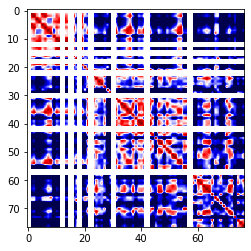

In [20]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
_distmap = squareform(pdist(chr_2_zxys_list['1'][0]))
plt.figure()
plt.imshow(_distmap, cmap='seismic_r', vmin=0, vmax=3000)
plt.show()